In [43]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import wrangle_scott
#splits, scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:

df= wrangle_scott.get_wine()



In [3]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_type,white
0,7.4,0.70,0.00,1.9,0.076,0.011,0.034,0.9978,3.51,0.56,9.4,5,red,0
1,7.8,0.88,0.00,2.6,0.098,0.025,0.067,0.9968,3.20,0.68,9.8,5,red,0
2,7.8,0.76,0.04,2.3,0.092,0.015,0.054,0.9970,3.26,0.65,9.8,5,red,0
3,11.2,0.28,0.56,1.9,0.075,0.017,0.060,0.9980,3.16,0.58,9.8,6,red,0
4,7.4,0.70,0.00,1.9,0.076,0.011,0.034,0.9978,3.51,0.56,9.4,5,red,0


In [4]:
train, validate, test = wrangle_scott.split_data(df)

train -> (3897, 14), 59.98%
validate -> (1300, 14),20.01%
test -> (1300, 14), 20.01%


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3897 entries, 3353 to 548
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         3897 non-null   float64
 1   volatile_acidity      3897 non-null   float64
 2   citric_acid           3897 non-null   float64
 3   residual_sugar        3897 non-null   float64
 4   chlorides             3897 non-null   float64
 5   free_sulfur_dioxide   3897 non-null   float64
 6   total_sulfur_dioxide  3897 non-null   float64
 7   density               3897 non-null   float64
 8   ph                    3897 non-null   float64
 9   sulphates             3897 non-null   float64
 10  alcohol               3897 non-null   float64
 11  quality               3897 non-null   int64  
 12  wine_type             3897 non-null   object 
 13  white                 3897 non-null   uint8  
dtypes: float64(11), int64(1), object(1), uint8(1)
memory usage: 430.0+ KB


In [26]:
train.describe(include='all')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_type,white
count,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897,3897.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,white,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2936,NaN
mean,7.234770,0.338758,0.320719,5.533423,0.056252,0.030800,0.116135,0.994752,3.217865,0.530742,10.479193,5.812933,NaN,0.753400
std,1.302097,0.164181,0.146233,4.828980,0.035599,0.018071,0.056967,0.003022,0.161605,0.148456,1.192935,0.867007,NaN,0.431087
min,3.800000,0.080000,0.000000,0.600000,0.012000,0.001000,0.007000,0.987110,2.740000,0.220000,8.000000,3.000000,NaN,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,0.017000,0.078000,0.992400,3.110000,0.430000,9.500000,5.000000,NaN,1.000000
50%,7.000000,0.290000,0.310000,3.200000,0.047000,0.029000,0.118000,0.994940,3.210000,0.510000,10.300000,6.000000,NaN,1.000000
75%,7.700000,0.400000,0.390000,8.200000,0.065000,0.042000,0.156000,0.997000,3.320000,0.600000,11.300000,6.000000,NaN,1.000000


In [35]:
#sulphates sum of free and total sulfur .... no
0.030800+0.116135

0.146935

In [28]:
# is quality catagorical?
train.quality

3353    6
2032    4
6223    6
2817    8
1293    4
       ..
4918    5
3542    5
1884    5
2206    5
548     6
Name: quality, Length: 3897, dtype: int64

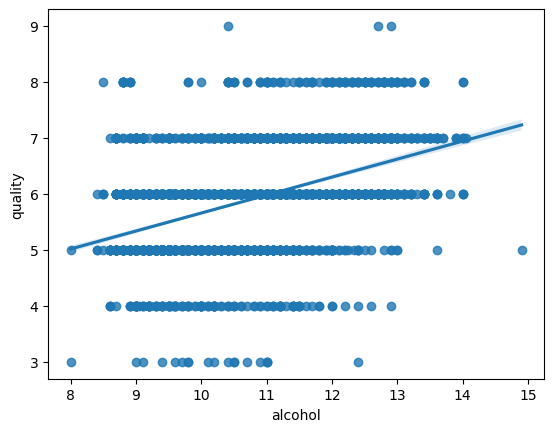

In [9]:
sns.regplot(x='alcohol', y='quality', data=train)
plt.show()


<AxesSubplot:xlabel='alcohol', ylabel='quality'>

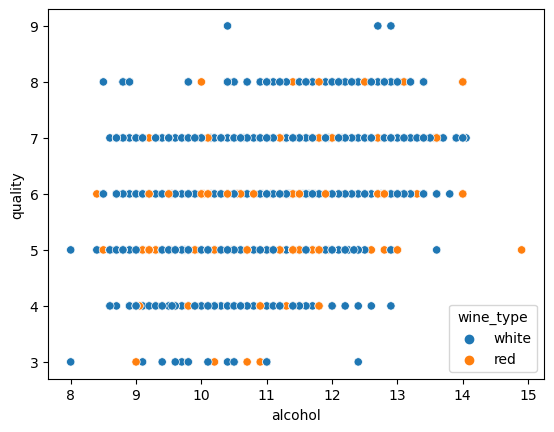

In [11]:
sns.scatterplot(data=train,x='alcohol',y='quality',hue='wine_type')

<BarContainer object of 3897 artists>

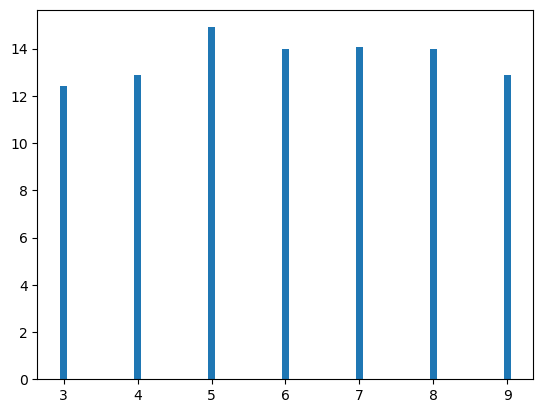

In [20]:
plt.bar(x='quality',height='alcohol',data=train,width=.1,)

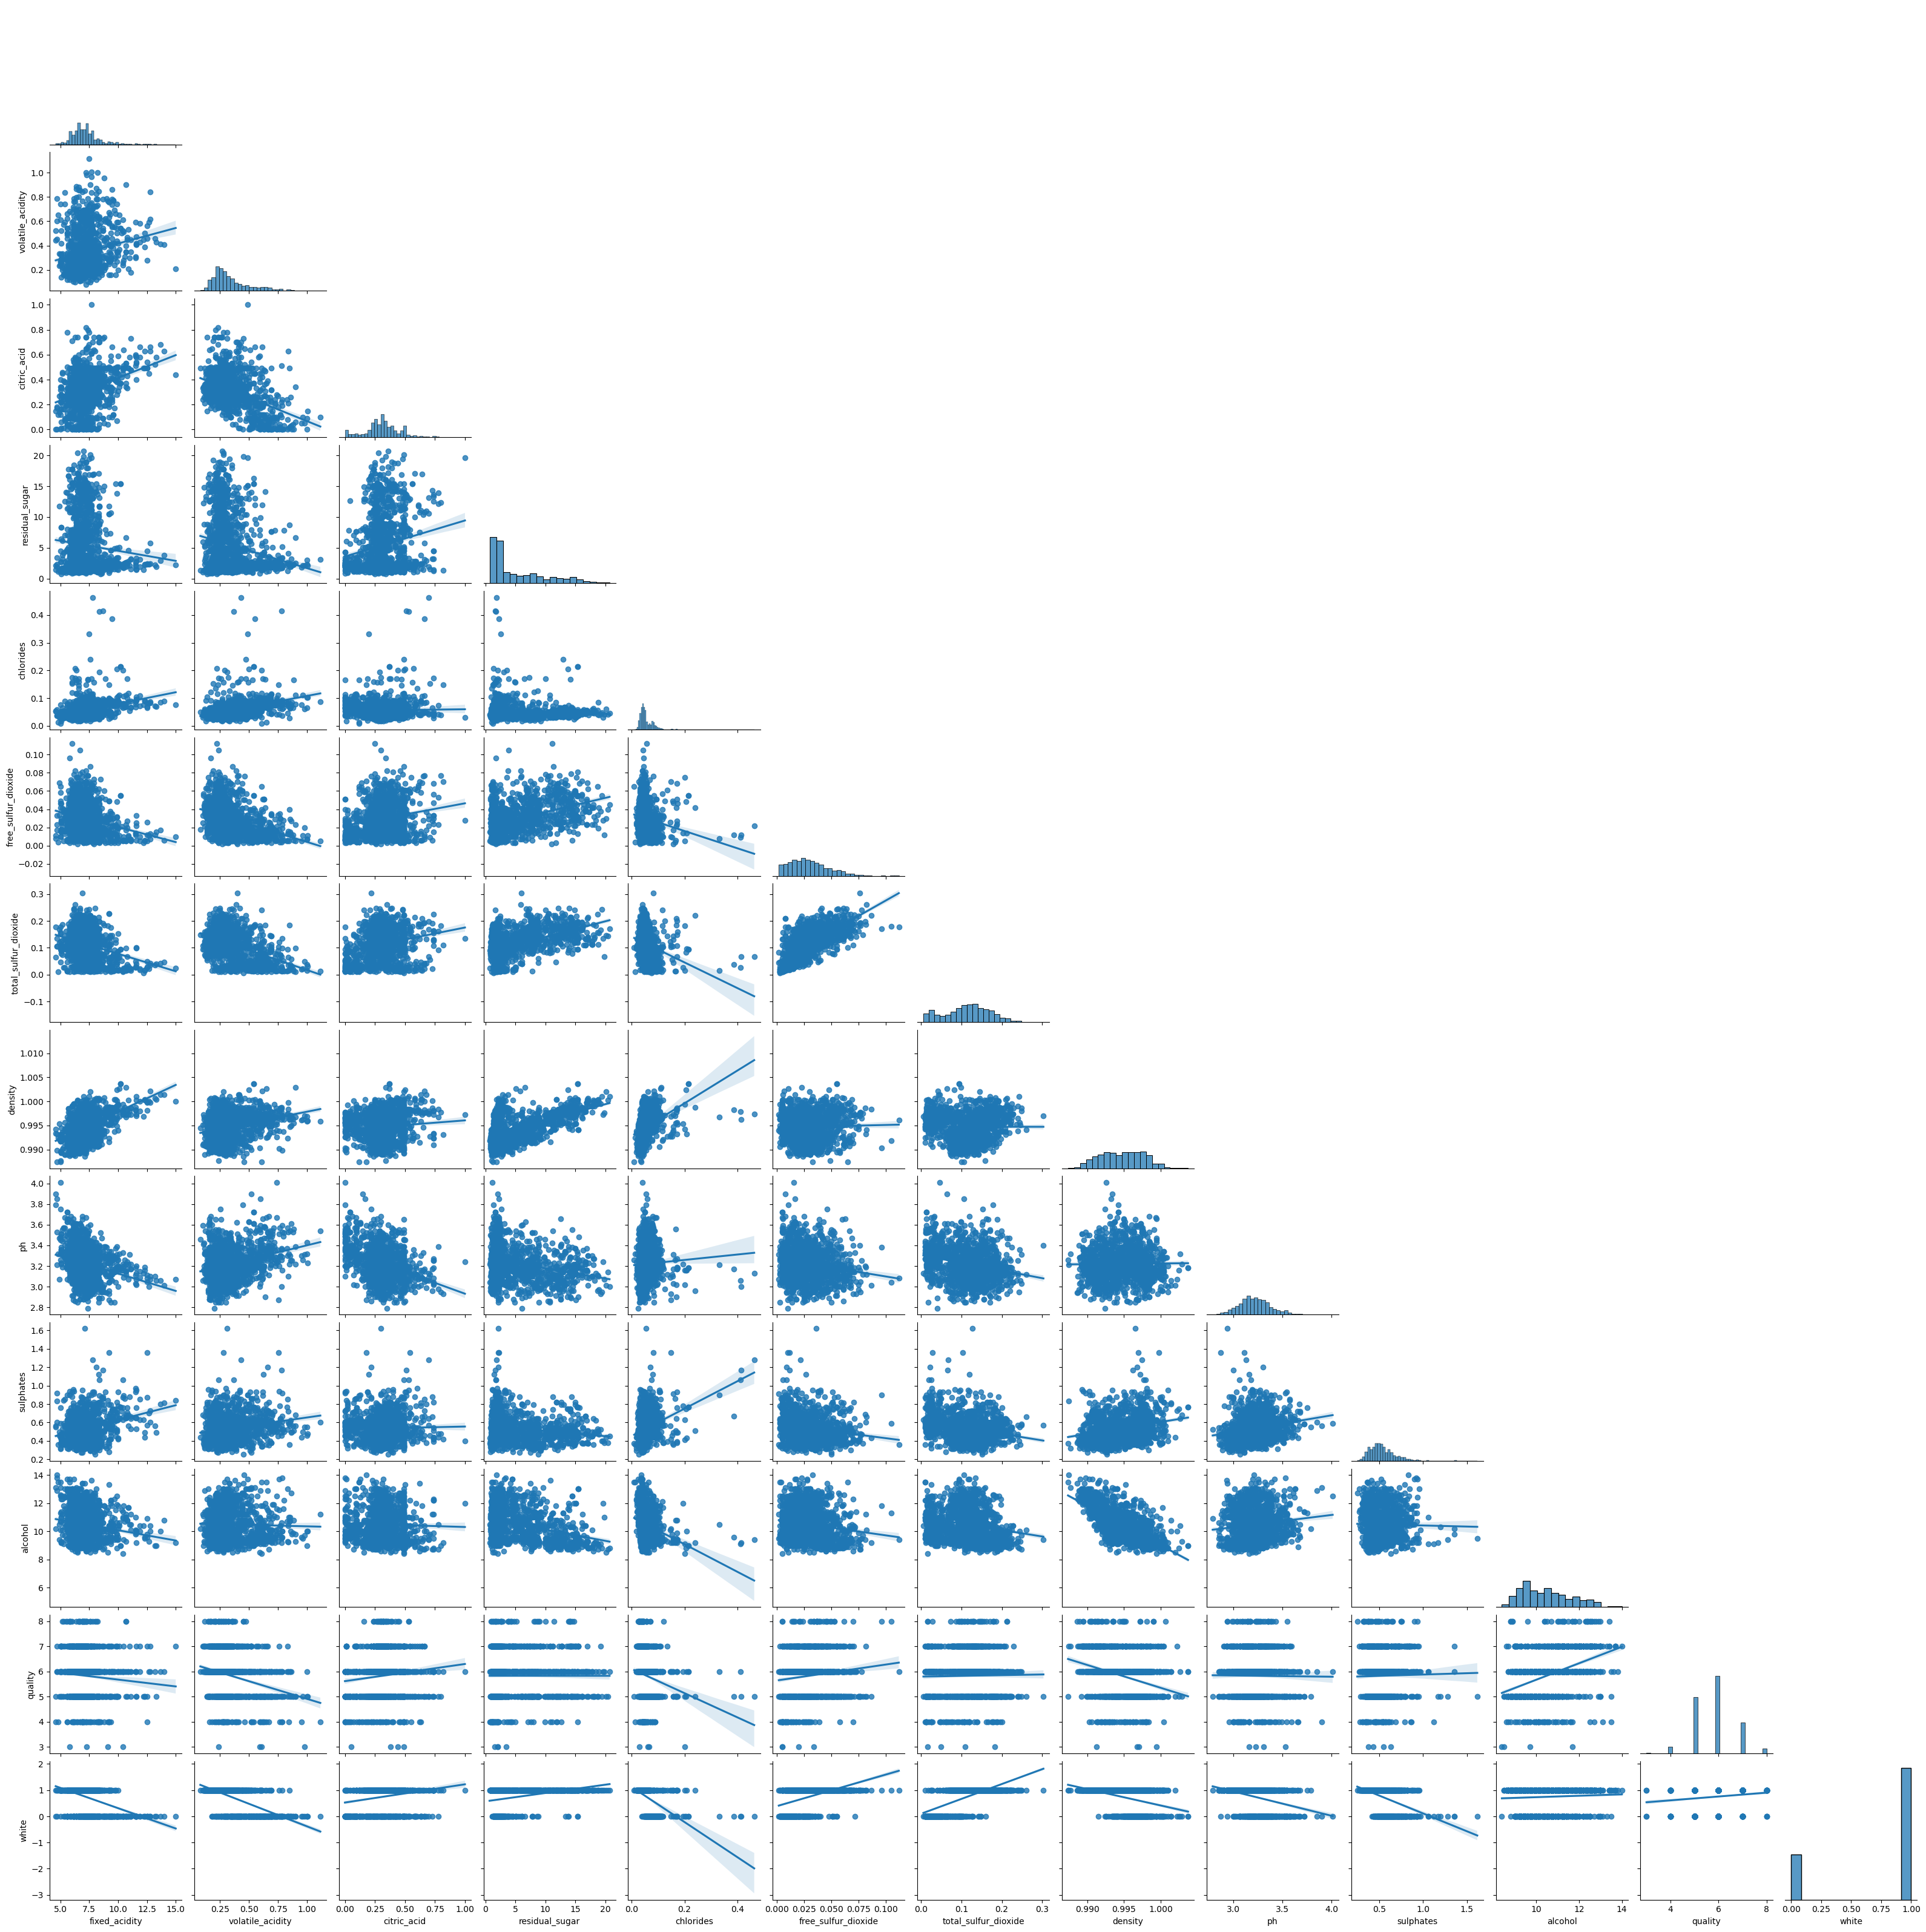

In [22]:
sns.pairplot(test, kind='reg',corner=True)


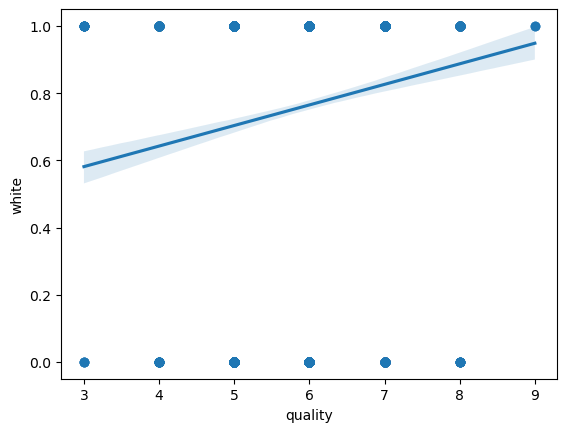

In [25]:
sns.regplot(x='quality', y='white', data=train)
plt.show()

<AxesSubplot:>

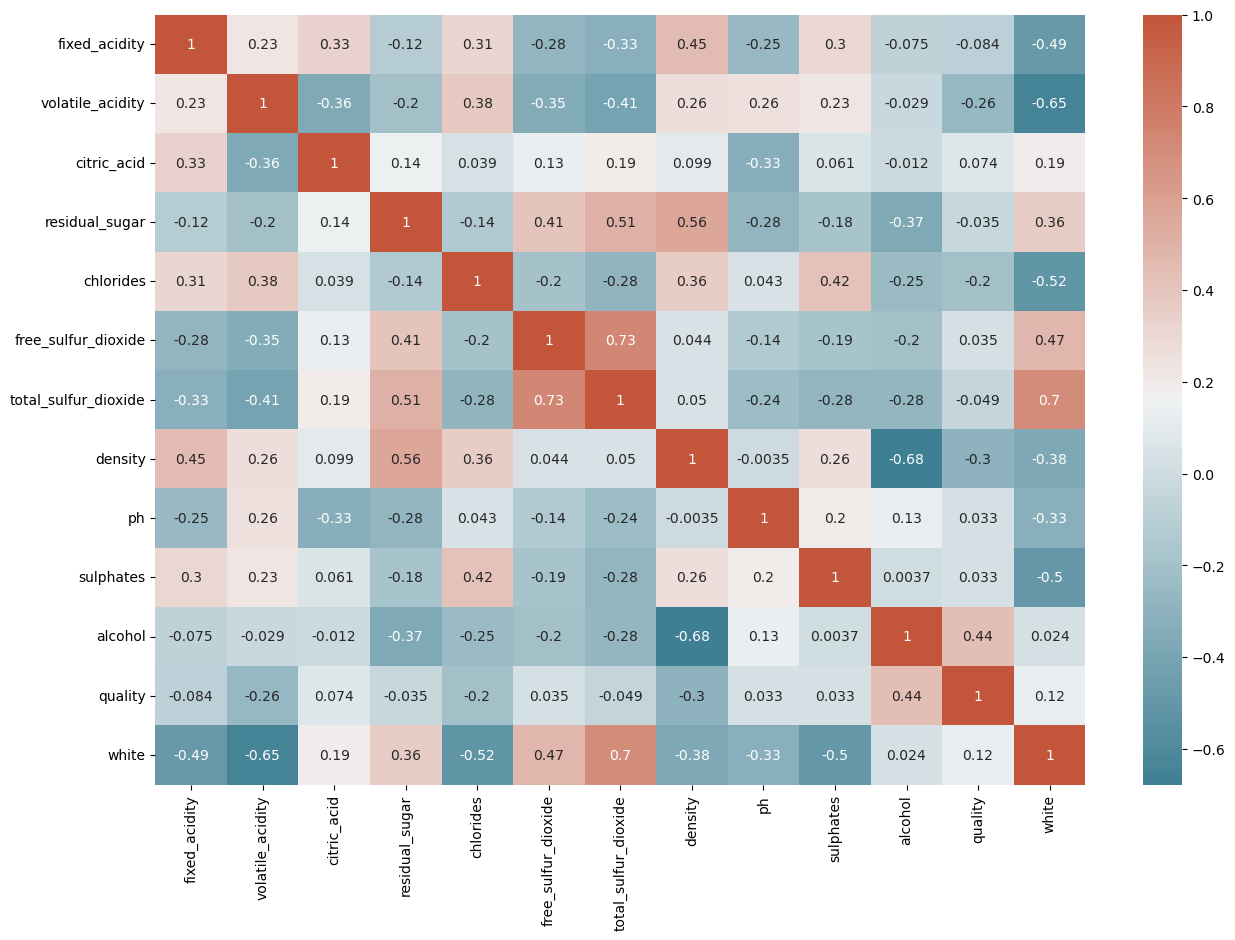

In [52]:
corr = train.corr()
matplotlib.pyplot.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

### notes:
* alcohol / quality = .44
* volatile acidity / quality = .22
* sulphate / quality = .033
* citric acid / quality = .074

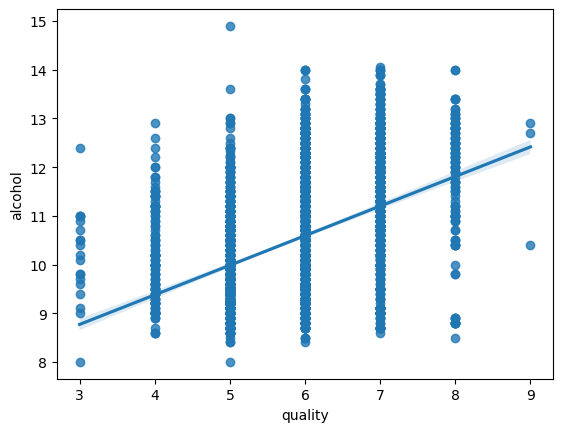

In [54]:
# higher is better
sns.regplot(y='alcohol', x='quality', data=train)
plt.show()

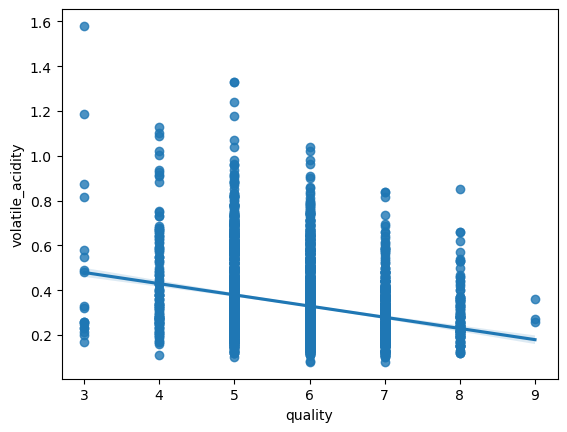

In [55]:

# lower is better
sns.regplot(y='volatile_acidity', x='quality', data=train)
plt.show()

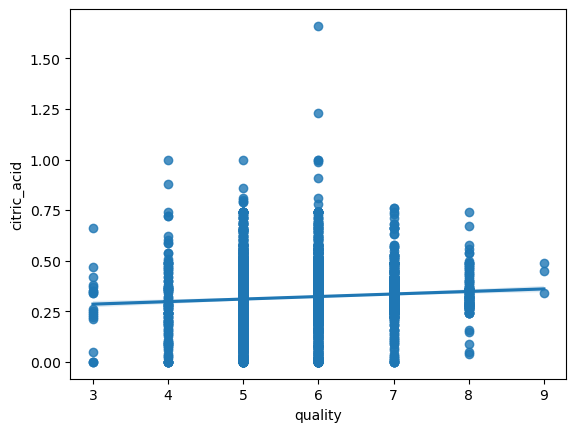

In [56]:
sns.regplot(y='citric_acid', x='quality', data=train)
plt.show()

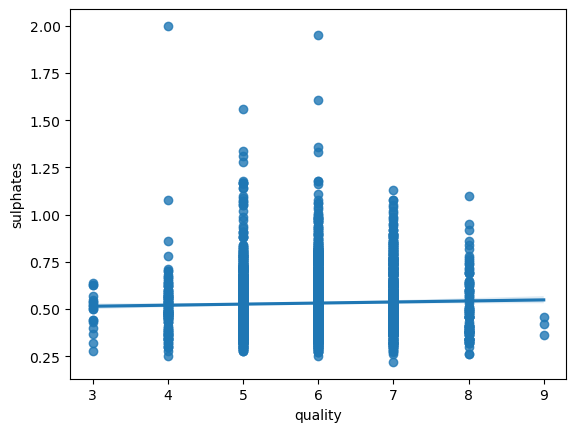

In [38]:
sns.regplot(y='sulphates', x='quality', data=train)
plt.show()

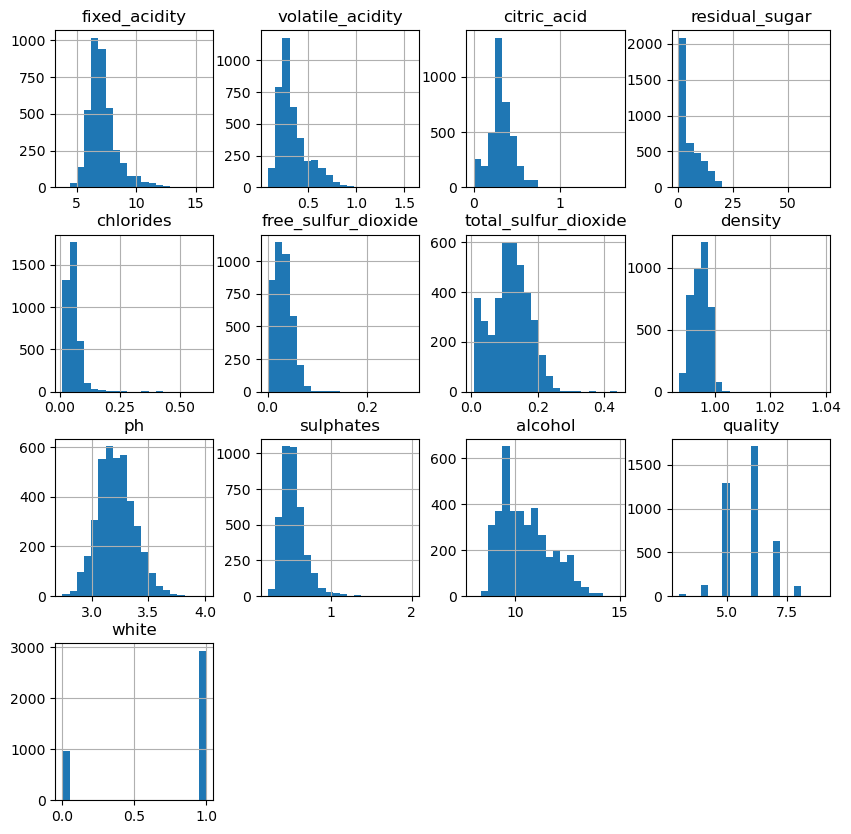

In [57]:
train.hist(bins=20, figsize=(10, 10))
plt.show()

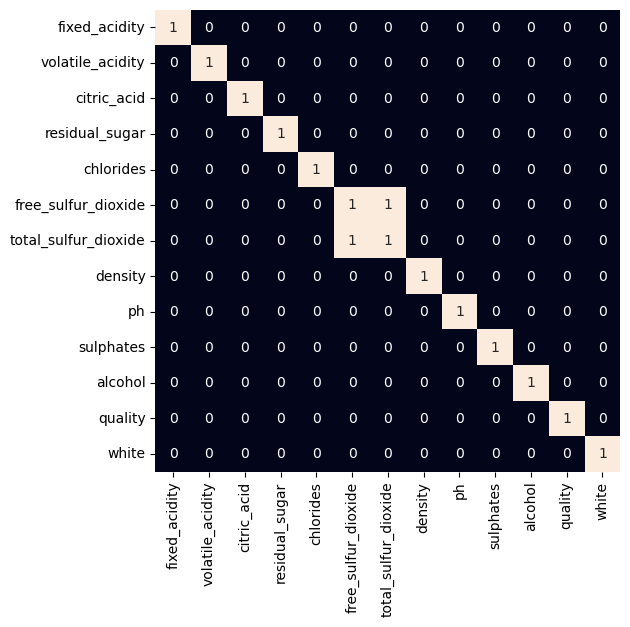

In [62]:
# looking for highly coorolated features
# free and total dioxide are highly coralated drop one
# drop total as free is likely the more important of the 2
plt.figure(figsize=(6, 6))
sns.heatmap(train.corr() > 0.7, annot=True, cbar=False)
plt.show()